In [1]:
import numpy as np
import numpy 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib notebook

In [2]:
train_data = np.load("train_images.npy")
labels = np.load("train_labels.npy")
# labels = labels.astype(int)

### Prepairing Data

#### Creating Vectors

In [3]:
labels = labels.flatten().reshape(labels.shape[0])

In [4]:
train_data = train_data / train_data.max()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.25, random_state=0)

### Train

In [6]:
def convert_labels(l):
    vector = np.zeros(10)
    vector[l] = 1
    return vector

In [7]:
def softmax(X, b):
    z = X.dot(b)
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

In [8]:
def loss(X, y, b):
    prob = softmax(X, b) 
    loss = (-1 / len(X)) * np.sum(y * np.log(prob))
    return loss

In [9]:
def grad (y, X, b):
    h = softmax(X, b)
    return (-1 / len(X)) * np.dot(X.T,(y - h))

In [10]:
def train(X, y, steps=10, lr=1e-2):
    b = np.zeros([x_train.shape[1],len(np.unique(y))])
    losses = []
    y = np.array([convert_labels(int(a)) for a in y])
    for i in range(steps):        
        gradient = grad(y, X, b)
        b = b - lr * gradient
        l = loss(X, y, b) 
        losses.append(l)
        if i % 100 == 1:
            print("step: {}, loss: {}".format(i, l))
    return b, losses

In [11]:
w, losses = train(x_train, y_train, steps=1000)

step: 1, loss: 2.2811127889218006
step: 101, loss: 1.5449307375539574
step: 201, loss: 1.1893317760947077
step: 301, loss: 0.9972083388987946
step: 401, loss: 0.879276372054964
step: 501, loss: 0.7995780519352573
step: 601, loss: 0.7418995013165214
step: 701, loss: 0.6980295788810766
step: 801, loss: 0.6633976429263801
step: 901, loss: 0.6352624995926711


In [13]:
predictions = softmax(x_test, w)

In [14]:
preds = np.argmax(predictions,axis=1)

In [15]:
(preds == y_test).mean() * 100

86.0

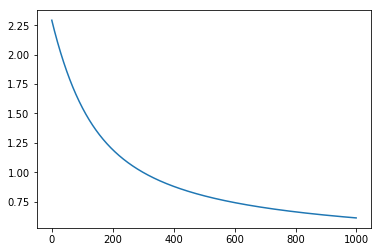

In [16]:
plt.plot(losses)